## Overview
This notebook is a continuation of the simple peceptron
*  We will <mark>increase the number of inputs from 2 to 64</mark>.
*  So that <mark>each input is learning on a specific pixel</mark> in the card
*  We will train the perceptron on a deck of cards.
*  Some of the cards are vertically partitioned. Some are horizontally partitioned.
*  Perceptron should be <mark>learn to distinguish between horizontal and vertical cards</mark>. 

## The Data
* Each card is generated as a 8x8 matrix. 
* At some random horizontal offset, or vertical offset, the card will only output positive values.
* Positive output is shows in green, negative in red.

<img src="../static/h1.png" alt="Card" style="width: 200px;">

## The Deck
We generate multiple cards to create a deck of cards. 

<img src="../static/h1.png" alt="Card" style="width: 150px;"><img src="../static/h2.png" alt="Card" style="width: 150px;">
<img src="../static/v1.png" alt="Card" style="width: 150px;"><img src="../static/v2.png" alt="Card" style="width: 150px;">

### Input Vector
For training purposes, the inputs are stored as an array of N cards. 
* Each card has 64 values - that are fed to the 64 inputs in the perceptron
* I.e. Each card is a 64-element array with values of 1 or -1.

E.g. here the input will be represented as

``` python
    X = [card_0, .., card_N]
    #each card is an array of 63 elements
    card_i =  [-1,1,-1..,-1]
```

![Input X contains N cards - each card looks like this.](../static/serialized-y.png)

### Output Vector
The outputs are correspondingly stored in a one dimensional array of N elements (representing N cards)
* Every value is `1` or `-1`
* `1` = Horizontal layout
*  `-1` = vertical layout 

``` python      
    Y = [ -1,     1,     1,     -1,   .... 1]             
```


In [1]:
import numpy as np
import copy
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

## Generate a deck of cards.
    * Some cards will be horizontal, some vertical
    * Furthermore the horizontal and vertical boundaries will be randomly between 10% and 90% of the length of the card

In [2]:
#generate a training card with a rectangular section marked positive 
def training_card(size=8, horizontal_partition = True, vertical_partition = True):
    #horizontal cards are positive, vertical cards are negative 
    horizontal_partition = bool(round(random.uniform(0,1)))
    vertical_partition = not horizontal_partition
    y = 1 if horizontal_partition else -1
    Y = np.zeros(size*size)    
    s = 0
    t_y = random.uniform(size/10,9*size/10) if horizontal_partition else -1
    t_x = random.uniform(size/10,9*size/10) if vertical_partition else -1  
    for i in range (0,size):    
        for j in range (0,size):
            Y[s]= 1 if (j> t_y and i>t_x) else -1
            s+=1
    return (Y,y)            
        

In [7]:
##
## debug and printing functions
##

def draw_card(Y,size=8):
    plt.figure(figsize=(1,1))   
    s =0
    for i in range (0,size):    
        for j in range (0,size):
            # Plot the positive samples            
            if Y[s] > 0:
                plt.scatter(i, j, s=50, marker='s', color='green',linewidths=2)
            # Plot the negative samples
            else:
                plt.scatter(i, j, s=50, marker='s', color='red', linewidths=2)
            s += 1     
    plt.show()

# print training weights
def debug_training_weights(weights, bias, convergence):
    ##
    # Try changing the number of epochs. Lower epochs are usually better. 
    ##
    if convergence:
        print(f"CONVERGENCE! Perceptron converged in  (epoch:{convergence})\n")
    else: 
        print(f"Perceptron failed to converge\n")
    #print(f"Weights => {weights}, bias={bias}\n{'-'*40}\n\n")

def debug_function(x,y,a):
    #if (a * y) <= 0:
        draw_card(x)
        print(f"Actual={'Horizontal' if y>0 else 'Vertical'} ({y}), Predicted={'Horizontal' if a>0 else 'Vertical'}({a})", "\x1b[31mMismatch\x1b[0m" if (a * y) <= 0 else "OK")



#### Perceptron Algorithm

$$ 
    z = \sum_{i=1}^n x_i w_i + b 
$$

$$ 
    output = \begin{cases}
        1 & \text{if }\ z > T \text{\, where T is some threshold }
        \\-1 & \text{otherwise}
        \end{cases}
$$
#### Learning 
We adjust the weight to reduce the error
$$
    \text{if } y*a \leq 0 \text{ then }
    \bigg|\begin{multline}
    \begin{aligned}
    w_i &= w_i + y x_i \text{ for i  = 1,2,3,..,n} \\
    b &= b + y
    \end{aligned}
    \end{multline}
$$

CONVERGENCE! Perceptron converged in  (epoch:2)



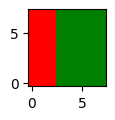

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


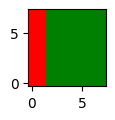

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


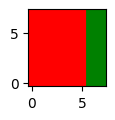

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



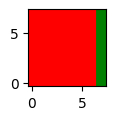

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


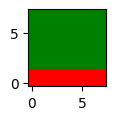

Actual=Horizontal (1), Predicted=Horizontal(39.0) OK


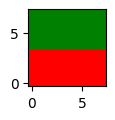

Actual=Horizontal (1), Predicted=Horizontal(63.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



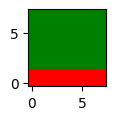

Actual=Horizontal (1), Predicted=Horizontal(39.0) OK


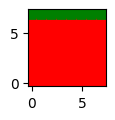

Actual=Horizontal (1), Predicted=Horizontal(3.0) OK


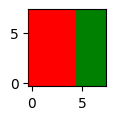

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



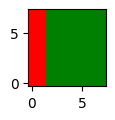

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


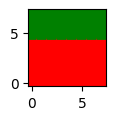

Actual=Horizontal (1), Predicted=Horizontal(43.0) OK


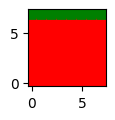

Actual=Horizontal (1), Predicted=Horizontal(3.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



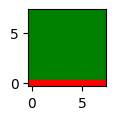

Actual=Horizontal (1), Predicted=Horizontal(27.0) OK


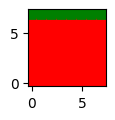

Actual=Horizontal (1), Predicted=Horizontal(3.0) OK


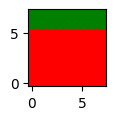

Actual=Horizontal (1), Predicted=Horizontal(23.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



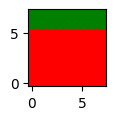

Actual=Horizontal (1), Predicted=Horizontal(23.0) OK


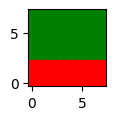

Actual=Horizontal (1), Predicted=Horizontal(51.0) OK


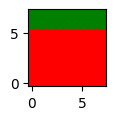

Actual=Horizontal (1), Predicted=Horizontal(23.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



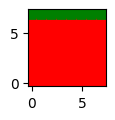

Actual=Horizontal (1), Predicted=Horizontal(3.0) OK


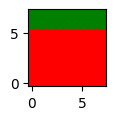

Actual=Horizontal (1), Predicted=Horizontal(23.0) OK


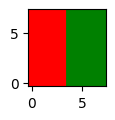

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



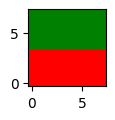

Actual=Horizontal (1), Predicted=Horizontal(63.0) OK


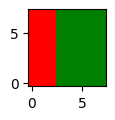

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


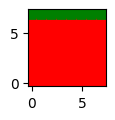

Actual=Horizontal (1), Predicted=Horizontal(3.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



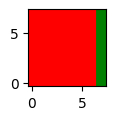

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


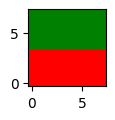

Actual=Horizontal (1), Predicted=Horizontal(63.0) OK


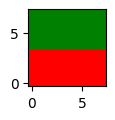

Actual=Horizontal (1), Predicted=Horizontal(63.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



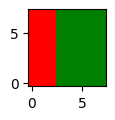

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


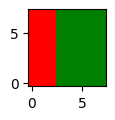

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


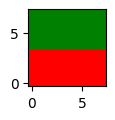

Actual=Horizontal (1), Predicted=Horizontal(63.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



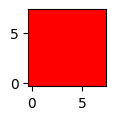

Actual=Horizontal (1), Predicted=Vertical(-17.0) Mismatch


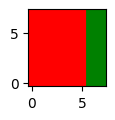

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK


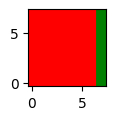

Actual=Vertical (-1), Predicted=Vertical(-49.0) OK
Prediction Errors:1
CONVERGENCE! Perceptron converged in  (epoch:3)



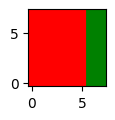

Actual=Vertical (-1), Predicted=Vertical(-32.0) OK


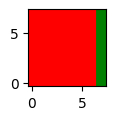

Actual=Vertical (-1), Predicted=Vertical(-16.0) OK


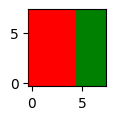

Actual=Vertical (-1), Predicted=Vertical(-48.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



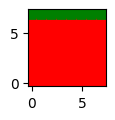

Actual=Horizontal (1), Predicted=Horizontal(64.0) OK


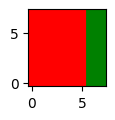

Actual=Vertical (-1), Predicted=Vertical(-32.0) OK


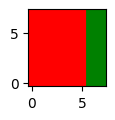

Actual=Vertical (-1), Predicted=Vertical(-32.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



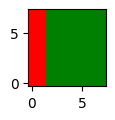

Actual=Vertical (-1), Predicted=Vertical(-96.0) OK


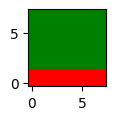

Actual=Horizontal (1), Predicted=Vertical(0.0) Mismatch


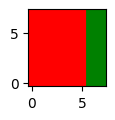

Actual=Vertical (-1), Predicted=Vertical(-32.0) OK
Prediction Errors:1
CONVERGENCE! Perceptron converged in  (epoch:2)



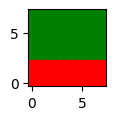

Actual=Horizontal (1), Predicted=Horizontal(81.0) OK


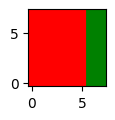

Actual=Vertical (-1), Predicted=Vertical(-47.0) OK


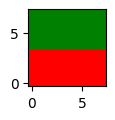

Actual=Horizontal (1), Predicted=Horizontal(97.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



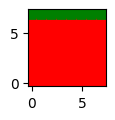

Actual=Horizontal (1), Predicted=Horizontal(49.0) OK


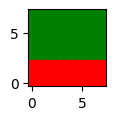

Actual=Horizontal (1), Predicted=Horizontal(81.0) OK


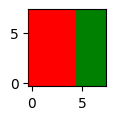

Actual=Vertical (-1), Predicted=Vertical(-55.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



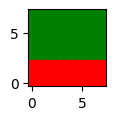

Actual=Horizontal (1), Predicted=Horizontal(81.0) OK


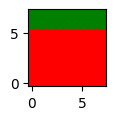

Actual=Horizontal (1), Predicted=Horizontal(65.0) OK


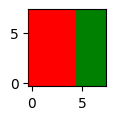

Actual=Vertical (-1), Predicted=Vertical(-55.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



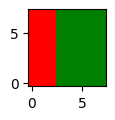

Actual=Vertical (-1), Predicted=Vertical(-71.0) OK


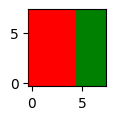

Actual=Vertical (-1), Predicted=Vertical(-55.0) OK


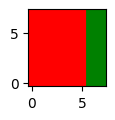

Actual=Vertical (-1), Predicted=Vertical(-47.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



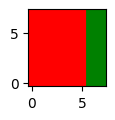

Actual=Vertical (-1), Predicted=Vertical(-47.0) OK


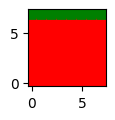

Actual=Horizontal (1), Predicted=Horizontal(49.0) OK


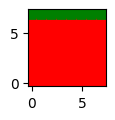

Actual=Horizontal (1), Predicted=Horizontal(49.0) OK
Prediction Errors:0
CONVERGENCE! Perceptron converged in  (epoch:1)



In [8]:
import sys, site
sys.path.insert(0,"..") 
from perceptron import perceptron as tron


#generate 10 cards and train to detect horizontal partitions     
size = 8
num_cards = 3
num_decks = 20

#initialize weights
weights = []
bias = None
prediction_errors=[1]

for decks in range (0,num_decks):
    #store a new deck of cards in X and Y
    X_64 = []
    Y_64= []
    for c in range (0,num_cards):
        (X,y) = training_card(size=size)      
        #print(f"X={X},\nY={y}")
        #draw_card(X)
        X_64.append(X)
        Y_64.append(y)

    if not len(weights):
        #init
        weights = np.zeros(size*size)
        bias = 0
    else:
        #use the previous weights to predict this deck. How well did you do?
        p = tron.predict_only(X_64,Y_64,weights, bias,debug_function=debug_function )
        prediction_errors.append(p/num_cards)

    (weights,bias,convergence) = tron.perceptron(X_64,Y_64, weights, bias, epochs=50)
    debug_training_weights(weights, bias, convergence)     


In [5]:
#show the prediction errors
from mm_include import mermaid

def running_average(data_array):
    run_avg = []
    for i, error in enumerate(data_array):
        if i == 0:
            run_avg.append(error)
        else:
            run_avg.append((run_avg[i-1]*i + error)/(i+1))
    return run_avg    

running_avg_prediction_errors = running_average(prediction_errors)
    
mermaid(f"""
 xychart-beta
    title "Perceptron Error Rate"
    x-axis "Number of Decks" {list(range(1,num_decks))}
    y-axis "Prediction Error" 0 --> 1    
    bar {prediction_errors}
    line "Prediction Error running avereg" {running_avg_prediction_errors}
    """)